<a href="https://colab.research.google.com/github/Hlamulo1/Research-on-ensemble-methods/blob/main/results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
/content/drive/My Drive/MalwareData
drebin.csv  kronodroid.csv  malgenome.csv  MalwareData.csv  TUANDROMD.csv
The shape of the legit dataset is: 41323 samples, 56 features
The shape of the mal dataset is: 96724 samples, 56 features


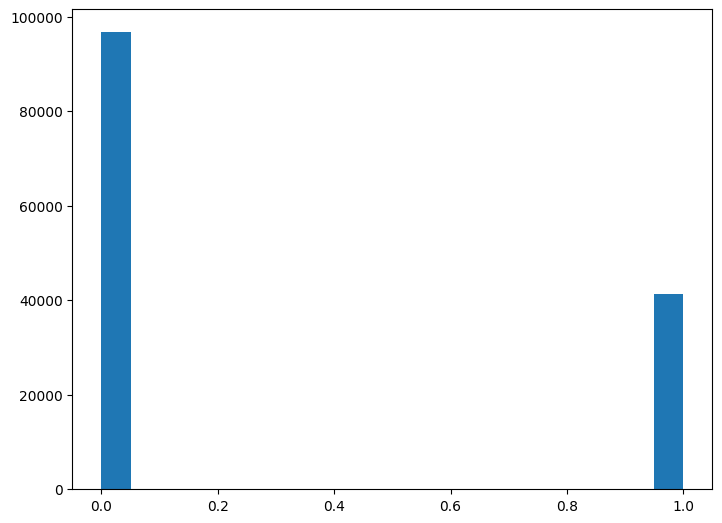

In [ ]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Install pandas (you don't need to install it twice)
# !pip install pandas

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Change the working directory to the location of your data
%cd '/content/drive/My Drive/MalwareData'

# List files in the directory
!ls

# Load the dataset
file_path = 'MalwareData.csv'
malData = pd.read_csv(file_path, sep='|', low_memory=True)

# Display the first few rows of the dataset
malData.head()

# Check the shape of the dataset
malData.shape

# Display summary statistics
malData.describe()

# Split the data into 'legitimate' and 'malicious'
legit = malData.iloc[:41323].drop(["legitimate"], axis=1)
mal = malData.iloc[41323:].drop(["legitimate"], axis=1)

print("The shape of the legit dataset is: %s samples, %s features" % (legit.shape[0], legit.shape[1]))
print("The shape of the mal dataset is: %s samples, %s features" % (mal.shape[0], mal.shape[1]))

# Plot a histogram of the 'legitimate' column
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.hist(malData['legitimate'], 20)
plt.show()


# Data **cleaning**

In [ ]:
y=malData['legitimate']
malData=malData.drop(['legitimate'],axis=1)

In [ ]:
malData=malData.drop(['Name'],axis=1)
malData=malData.drop(['md5'],axis=1)
print(" The Name and md5 variables are removed successfully")

 The Name and md5 variables are removed successfully


Spilt into test and train **bold text**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(malData,y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(110437, 54)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import make_classification

clf = RandomForestClassifier(max_depth=2, random_state=0)

randomModel=clf.fit(X_train, y_train)



In [ ]:
from sklearn.metrics import f1_score,accuracy_score,auc,confusion_matrix


In [ ]:
#  Accuracy on the train dataset

train_pred=randomModel.predict(X_train)

accuracy_score(y_train,train_pred)

0.9828318407780001

In [ ]:
# Accuracy on the test dataset

prediction=randomModel.predict(X_test)

accuracy_score(y_test,prediction)

0.9838102136906918

In [ ]:
f1_score(y_test, prediction)

0.9730933606212002

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix for the test dataset
confusion_mat = confusion_matrix(y_test, prediction)

print("Confusion Matrix:")
print(confusion_mat)


Confusion Matrix:
[[19080   170]
 [  277  8083]]


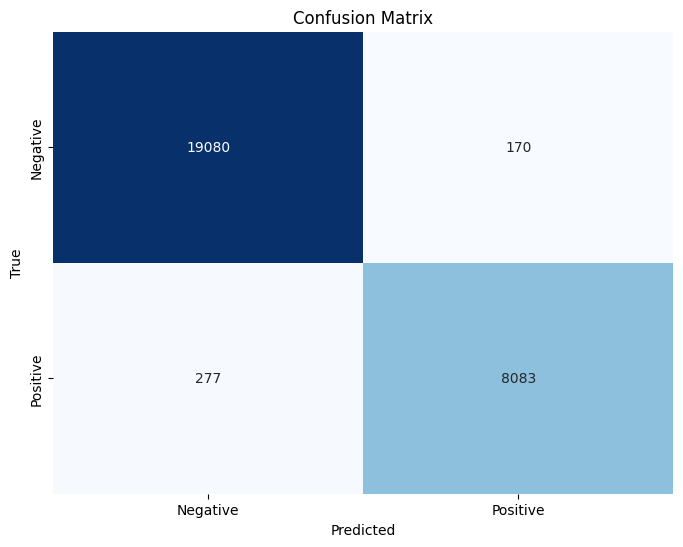

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix for the test dataset
confusion_mat = confusion_matrix(y_test, prediction)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


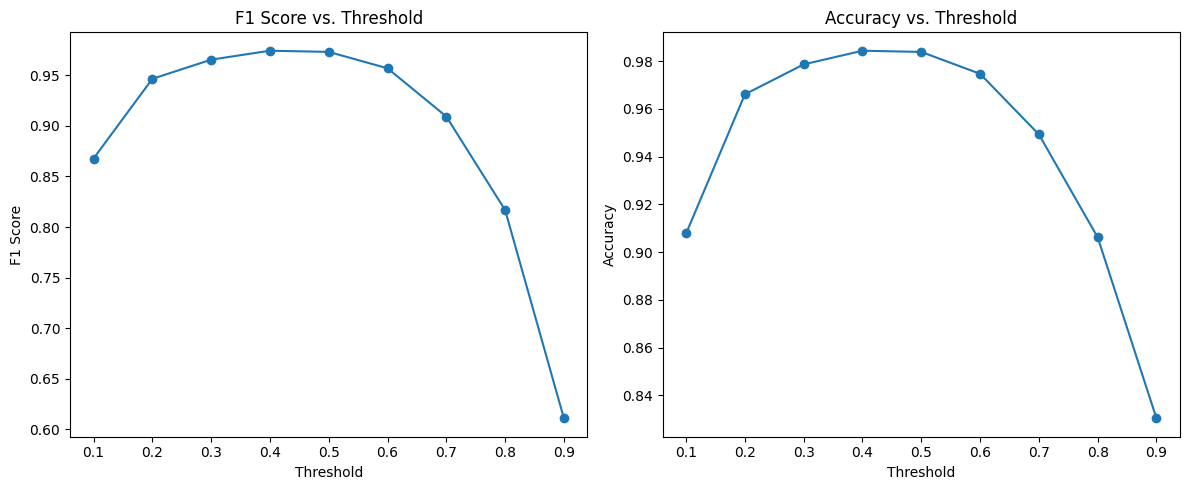

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score

# Calculate F1 score and accuracy for different thresholds
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
f1_scores = []
accuracies = []

for threshold in thresholds:
    threshold_predictions = (randomModel.predict_proba(X_test)[:, 1] > threshold).astype(int)
    f1 = f1_score(y_test, threshold_predictions)
    accuracy = accuracy_score(y_test, threshold_predictions)
    f1_scores.append(f1)
    accuracies.append(accuracy)

# Create subplots for F1 score and accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(thresholds, f1_scores, marker='o', linestyle='-')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Threshold')

plt.subplot(1, 2, 2)
plt.plot(thresholds, accuracies, marker='o', linestyle='-')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Threshold')

plt.tight_layout()
plt.show()


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-19975b4b64e4>", line 11, in <cell line: 11>
    malData = pd.read_csv(file_path, sep='|', low_memory=True)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



  File "/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py", line 331, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 950, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 605, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 1442, in __init__
    self._engine = self._make_engine(f, self.engine)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 1735, in _make_engine
    self.handles = get_handle(
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/common.py", line 856, in get_handle
    handle = open(
OSError: [Errno 107] Transport endp

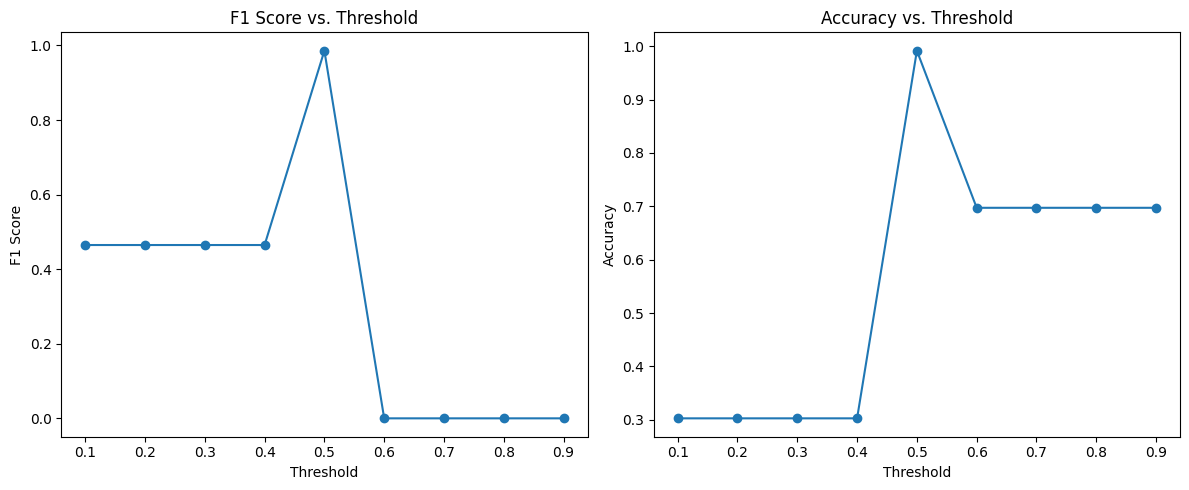

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score

# Calculate F1 score and accuracy for different thresholds
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
f1_scores = []
accuracies = []

for threshold in thresholds:
    threshold_predictions = (ada_boost_model.predict_proba(X_test)[:, 1] > threshold).astype(int)
    f1 = f1_score(y_test, threshold_predictions)
    accuracy = accuracy_score(y_test, threshold_predictions)
    f1_scores.append(f1)
    accuracies.append(accuracy)

# Create subplots for F1 score and accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(thresholds, f1_scores, marker='o', linestyle='-')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Threshold')

plt.subplot(1, 2, 2)
plt.plot(thresholds, accuracies, marker='o', linestyle='-')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Threshold')

plt.tight_layout()
plt.show()


The Name and md5 variables are removed successfully
The shape of the legit dataset is: 41323 samples, 54 features
The shape of the mal dataset is: 96724 samples, 54 features
Accuracy: 0.9914885910901847
F1 Score: 0.9859726616128455
Confusion Matrix:
[[19116   134]
 [  101  8259]]


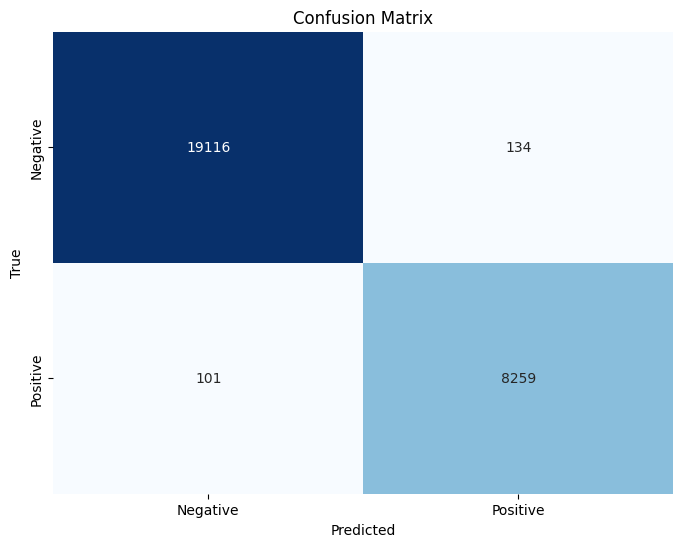

In [ ]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

# Load the dataset
file_path = 'MalwareData.csv'
malData = pd.read_csv(file_path, sep='|', low_memory=True)

# Drop unnecessary columns
malData = malData.drop(['Name', 'md5'], axis=1)
print("The Name and md5 variables are removed successfully")

# Split the data into 'legitimate' and 'malicious'
legit = malData.iloc[:41323].drop(["legitimate"], axis=1)
mal = malData.iloc[41323:].drop(["legitimate"], axis=1)

print("The shape of the legit dataset is: %s samples, %s features" % (legit.shape[0], legit.shape[1]))
print("The shape of the mal dataset is: %s samples, %s features" % (mal.shape[0], mal.shape[1]))

# Split the data into training and testing sets
y = malData['legitimate']
X = malData.drop(['legitimate'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an AdaBoostClassifier
base_classifier = RandomForestClassifier(max_depth=2, random_state=0)
ada_boost_model = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

# Fit the AdaBoost model on the training data
ada_boost_model.fit(X_train, y_train)

# Predictions on the test data
prediction = ada_boost_model.predict(X_test)

# Accuracy and F1 Score
accuracy = accuracy_score(y_test, prediction)
f1 = f1_score(y_test, prediction)

print("Accuracy:", accuracy)
print("F1 Score:", f1)

# Calculate the confusion matrix for the test dataset
confusion_mat = confusion_matrix(y_test, prediction)
print("Confusion Matrix:")
print(confusion_mat)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


The Name and md5 variables are removed successfully
The shape of the legit dataset is: 41323 samples, 54 features
The shape of the mal dataset is: 96724 samples, 54 features
Accuracy: 0.9949293734154292
F1 Score: 0.9916427889207259
Confusion Matrix:
[[19164    86]
 [   54  8306]]


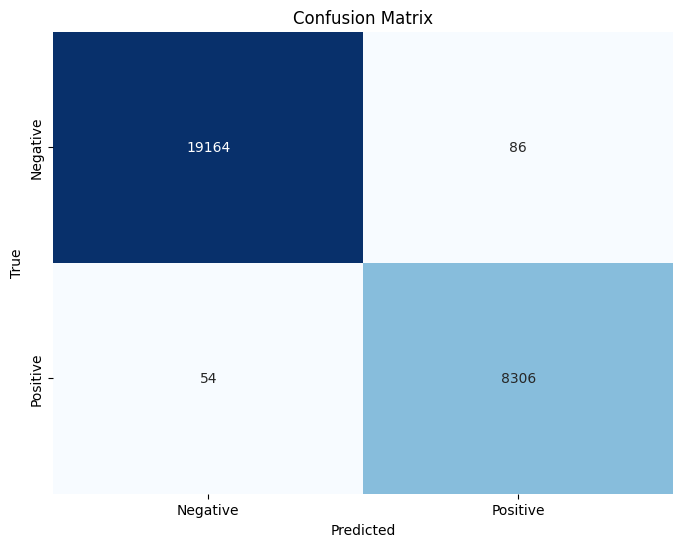

In [ ]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

# Load the dataset
file_path = 'MalwareData.csv'
malData = pd.read_csv(file_path, sep='|', low_memory=True)

# Drop unnecessary columns
malData = malData.drop(['Name', 'md5'], axis=1)
print("The Name and md5 variables are removed successfully")

# Split the data into 'legitimate' and 'malicious'
legit = malData.iloc[:41323].drop(["legitimate"], axis=1)
mal = malData.iloc[41323:].drop(["legitimate"], axis=1)

print("The shape of the legit dataset is: %s samples, %s features" % (legit.shape[0], legit.shape[1]))
print("The shape of the mal dataset is: %s samples, %s features" % (mal.shape[0], mal.shape[1]))

# Split the data into training and testing sets
y = malData['legitimate']
X = malData.drop(['legitimate'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an AdaBoostClassifier
base_classifier = RandomForestClassifier(max_depth=2, random_state=0)
ada_boost_model = AdaBoostClassifier(base_classifier, n_estimators=500, random_state=42)

# Fit the AdaBoost model on the training data
ada_boost_model.fit(X_train, y_train)

# Predictions on the test data
prediction = ada_boost_model.predict(X_test)

# Accuracy and F1 Score
accuracy = accuracy_score(y_test, prediction)
f1 = f1_score(y_test, prediction)

print("Accuracy:", accuracy)
print("F1 Score:", f1)

# Calculate the confusion matrix for the test dataset
confusion_mat = confusion_matrix(y_test, prediction)
print("Confusion Matrix:")
print(confusion_mat)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


The Name and md5 variables are removed successfully
The shape of the legit dataset is: 41323 samples, 54 features
The shape of the mal dataset is: 96724 samples, 54 features
Accuracy: 0.995110467222021
F1 Score: 0.9919446267677069
Confusion Matrix:
[[19163    87]
 [   48  8312]]


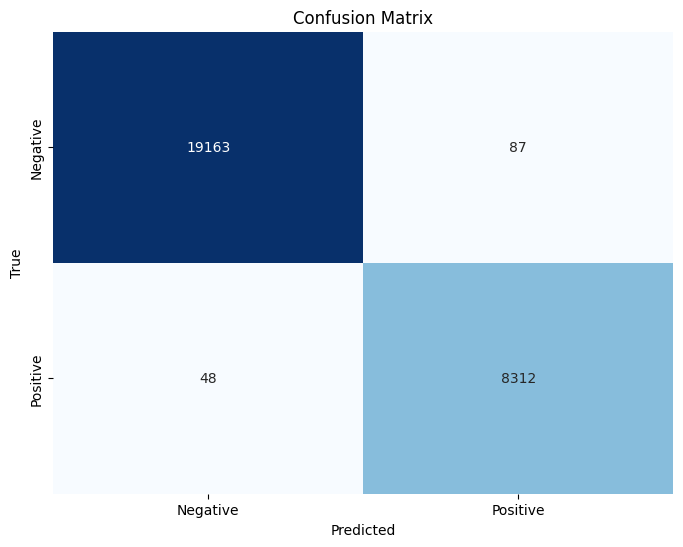

In [ ]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

# Load the dataset
file_path = 'MalwareData.csv'
malData = pd.read_csv(file_path, sep='|', low_memory=True)

# Drop unnecessary columns
malData = malData.drop(['Name', 'md5'], axis=1)
print("The Name and md5 variables are removed successfully")

# Split the data into 'legitimate' and 'malicious'
legit = malData.iloc[:41323].drop(["legitimate"], axis=1)
mal = malData.iloc[41323:].drop(["legitimate"], axis=1)

print("The shape of the legit dataset is: %s samples, %s features" % (legit.shape[0], legit.shape[1]))
print("The shape of the mal dataset is: %s samples, %s features" % (mal.shape[0], mal.shape[1]))

# Split the data into training and testing sets
y = malData['legitimate']
X = malData.drop(['legitimate'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an AdaBoostClassifier
base_classifier = RandomForestClassifier(max_depth=2, random_state=0)
ada_boost_model = AdaBoostClassifier(base_classifier, n_estimators=1000, random_state=42)

# Fit the AdaBoost model on the training data
ada_boost_model.fit(X_train, y_train)

# Predictions on the test data
prediction = ada_boost_model.predict(X_test)

# Accuracy and F1 Score
accuracy = accuracy_score(y_test, prediction)
f1 = f1_score(y_test, prediction)

print("Accuracy:", accuracy)
print("F1 Score:", f1)

# Calculate the confusion matrix for the test dataset
confusion_mat = confusion_matrix(y_test, prediction)
print("Confusion Matrix:")
print(confusion_mat)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


The Name and md5 variables are removed successfully
The shape of the legit dataset is: 41323 samples, 54 features
The shape of the mal dataset is: 96724 samples, 54 features
Accuracy: 0.9953639985512496
F1 Score: 0.9923618570235112
Confusion Matrix:
[[19167    83]
 [   45  8315]]


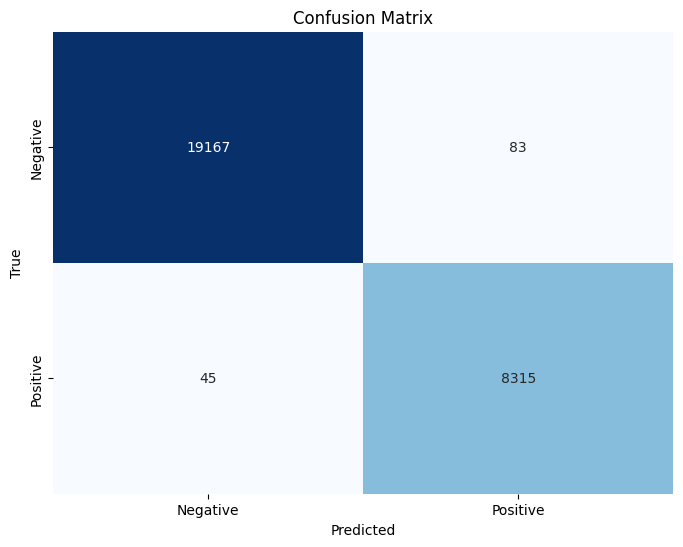

In [ ]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

# Load the dataset
file_path = 'MalwareData.csv'
malData = pd.read_csv(file_path, sep='|', low_memory=True)

# Drop unnecessary columns
malData = malData.drop(['Name', 'md5'], axis=1)
print("The Name and md5 variables are removed successfully")

# Split the data into 'legitimate' and 'malicious'
legit = malData.iloc[:41323].drop(["legitimate"], axis=1)
mal = malData.iloc[41323:].drop(["legitimate"], axis=1)

print("The shape of the legit dataset is: %s samples, %s features" % (legit.shape[0], legit.shape[1]))
print("The shape of the mal dataset is: %s samples, %s features" % (mal.shape[0], mal.shape[1]))

# Split the data into training and testing sets
y = malData['legitimate']
X = malData.drop(['legitimate'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an AdaBoostClassifier
base_classifier = RandomForestClassifier(max_depth=2, random_state=0)
ada_boost_model = AdaBoostClassifier(base_classifier, n_estimators=2000, random_state=42)

# Fit the AdaBoost model on the training data
ada_boost_model.fit(X_train, y_train)

# Predictions on the test data
prediction = ada_boost_model.predict(X_test)

# Accuracy and F1 Score
accuracy = accuracy_score(y_test, prediction)
f1 = f1_score(y_test, prediction)

print("Accuracy:", accuracy)
print("F1 Score:", f1)

# Calculate the confusion matrix for the test dataset
confusion_mat = confusion_matrix(y_test, prediction)
print("Confusion Matrix:")
print(confusion_mat)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
